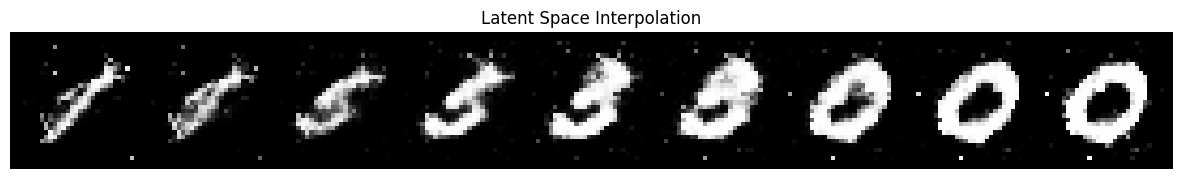

In [7]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

import torch.nn as nn

device = 'mps' if torch.backends.mps.is_available() else 'cpu'

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        # Construct generator. You should experiment with your model,
        # but the following is a good start:
        #   Linear args.latent_dim -> 128
        #   LeakyReLU(0.2)
        #   Linear 128 -> 256
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 256 -> 512
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 512 -> 1024
        #   Bnorm
        #   LeakyReLU(0.2)
        #   Linear 1024 -> 768
        #   Output non-linearity
        self.model = nn.Sequential(
            nn.Linear(100, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()  
        )

    def forward(self, z):
        img = self.model(z)
        return img.view(img.size(0), 1, 28, 28)

generator = Generator()
generator.load_state_dict(torch.load("mnist_generator.pt"))
generator.eval()
generator.to(device)

def interpolate_latent_space(generator, latent_dim, num_steps=7):
    """
    Interpolate between two latent vectors and generate corresponding images.
    
    Args:
        generator (torch.nn.Module): Trained generator model.
        latent_dim (int): Dimension of the latent space.
        num_steps (int): Number of interpolation steps between two points.

    Returns:
        torch.Tensor: A grid of generated images.
    """
    z1 = torch.randn(1, latent_dim, device=device)
    z2 = torch.randn(1, latent_dim, device=device)

    alphas = torch.linspace(0, 1, num_steps + 2, device=device) 

    interpolated_z = torch.stack([(1 - alpha) * z1 + alpha * z2 for alpha in alphas]).squeeze(1)

    gen_imgs = generator(interpolated_z).detach().cpu()

    grid = make_grid(gen_imgs, nrow=num_steps + 2, normalize=True, value_range=(-1, 1))
    return grid

def show_images(grid, title):
    """Display a grid of images."""
    plt.figure(figsize=(15, 5))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.title(title)
    plt.axis("off")
    plt.show()


torch.manual_seed(42) 
interpolation_grid = interpolate_latent_space(generator, 100)

show_images(interpolation_grid, title="Latent Space Interpolation")